In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv('data.csv')
data

,X1,X2,Y
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad
5,3,5,Good
6,4,6,Bad
7,8,7,Bad
8,7,9,Good
9,8,8,Bad


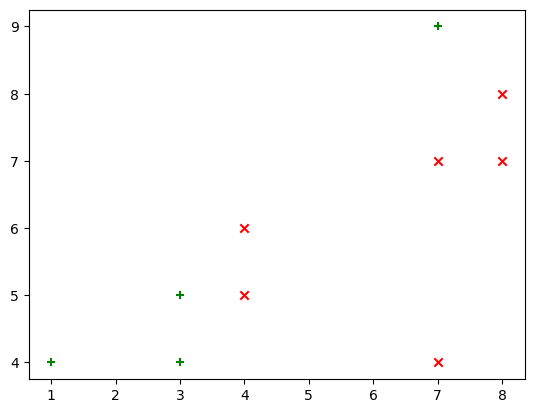

In [136]:
good = data[data['Y'] == 'Good']
bad = data[data['Y'] == 'Bad']

plt.scatter(good['X1'], good['X2'], c='g', marker='+')
plt.scatter(bad['X1'], bad['X2'], c='r', marker='x')

In [137]:
def Eucledian(x, y):
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2)**0.5

def Manhattan(x, y):
    return abs(x[0]-y[0]) + abs(x[1]-y[1])

def Minkowski(x, y, p=3):
    return ((abs(x[0]-y[0]))**p + (abs((x[1]-y[1]))**p))**(1/p)

def most_common(lst):
    g = sum(row.count('Good') for row in lst)
    b = sum(row.count('Bad') for row in lst)
    
    return 'Good' if g > b else lst[0][1] if g == b else 'Bad'

In [138]:
class KNearestNeighbours():
    def __init__(self, k=5, dist_measure=Eucledian):
        self.k = k
        self.dist_measure = dist_measure
        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        
    def predict(self, test):
        y_predict = []
        for x, y in zip(X,Y):
            y_predict.append([self.dist_measure(test, x), y])
        
        y_predict.sort()
            
        return most_common(y_predict[:self.k])

In [139]:
X = list(zip(data['X1'], data['X2']))
Y = list(data['Y'])

knn = KNearestNeighbours(k=3, dist_measure=Minkowski)
knn.fit(X,Y)
prediction = knn.predict((3,7))

print(prediction)

Bad
